In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0-rc1


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_model will get feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_model will get feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7f646a91cc10>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 4.95945215225
ENCODE_UNK 1
load frozen graph from /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/model.ckpt-20.73-17000.pb with mapfile /home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/model.ckpt-20.73-17000.map duration: 0.906170129776


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: e2aa815c9f9dda30f50716ef9b15629322161ae1


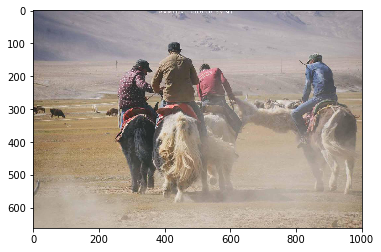

topwords of image:
荒芜 0.571623|狗拉着 0.566003|沙地 0.528377|塑像 0.508848|草原 0.506204|广袤 0.498537|驴 0.493655|土地 0.487632|沙漠 0.485811|达 0.484049|五指 0.454072|两只 0.447647|一群 0.445661|辽阔 0.445019|斗牛场 0.439386|平原 0.437031|空地 0.432185|枯黄 0.430828|滑车 0.427213|柔 0.425548|一望无垠 0.423445|广阔 0.420915|网旁 0.420123|擦皮鞋 0.414586|人群 0.411975|结冰 0.41178|山 0.41173|山谷 0.410306|禅杖 0.409142|人盛 0.404437|熙熙攘攘 0.401707|溶洞 0.400277|山脚下 0.398641|开阔 0.397739|尘土飞扬 0.397307|踏板 0.397274|景区 0.394027|桥墩 0.393477|宽旷 0.393276|马旁 0.39297|五位 0.390299|地图 0.388422|敲锣 0.388403|太空服 0.38548|搭建 0.384781|父 0.383558|竹 0.382895|光秃秃 0.382821|破 0.380863|滑沙 0.380074|宽广 0.379034|田间 0.378392|田边 0.377234|泥潭 0.37569|铁环 0.374624|光板 0.374431|坡 0.373059|山羊 0.372245|手风琴 0.371973|驴子 0.370199|两匹马 0.370023|人来人往 0.368667|神态 0.368413|乡间 0.368204|中 0.367829|蝌蚪 0.367746|人 0.367024|田园 0.366105|漫步 0.365984|形态各异 0.365301|山顶 0.365243|赶 0.364316|隔离 0.363815|干枯 0.363806|狗 0.362268|丹顶鹤 0.361512|互动 0.361433|只 0.360875|中有 0.359826|雾气 0.35868|燃烧 0.358442|乡村 0.3580

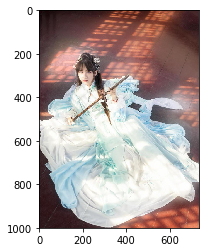

topwords of image:
莲蓬 0.622182|长衣 0.599077|夜空 0.589924|响 0.570659|夜晚 0.567287|棍子 0.560939|夜幕 0.559825|袋子 0.559298|漆黑 0.549002|块 0.54524|舞台 0.537174|剑 0.531526|求婚 0.528302|道具 0.525215|二胡 0.521426|上拉 0.518579|昏暗 0.517681|夜幕降临 0.517251|光板 0.514843|旁拉 0.50916|麻袋 0.502375|兵器 0.495533|转盘 0.483744|武器 0.480006|木剑 0.478624|一堆 0.467768|小提琴 0.462704|摄影棚 0.453127|数字 0.451377|开怀大笑 0.450566|演奏 0.449044|斧子 0.44412|文稿 0.438884|耙子 0.437426|失火 0.433625|肩挑 0.433142|一袋 0.42771|自 0.421314|皮影 0.420814|漫步 0.419836|拿花 0.41565|付钱 0.413857|互动 0.413823|标枪 0.411417|一根 0.410653|摘瓜 0.409006|铁环 0.405446|乒乓球室 0.404827|杆子 0.404602|垃圾桶 0.404307|工具 0.400612|松土 0.398843|枕头 0.39845|合并 0.39715|大刀 0.396131|服饰 0.394632|敲锣 0.3945|古装 0.394499|罩 0.394465|拍杆 0.393296|刨地 0.393119|刀 0.392888|礼物 0.392829|天 0.392494|露台 0.392078|攥 0.390858|掌 0.390481|刀具 0.38898|绚丽 0.387991|乐谱 0.387065|颜料 0.386853|短发 0.386734|提 0.386724|担子 0.38463|被子 0.383736|漆 0.383661|吹 0.383565|山有 0.38348|斧头 0.381995|车顶 0.380928|垃圾 0.380197|扛 0.380139|霜 0.379895|手镯

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.412 seconds.
Prefix dict has been built succesfully.


<UNK>
sim: [ 0.02714509]
text(q for exit): 
image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: 0d5bb5c1fcebec433bdd5a636c85e907d0d40535


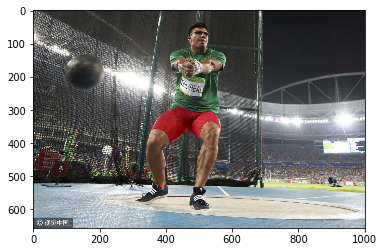

topwords of image:
跑道 0.688449|链球 0.682026|铅球 0.670615|莲蓬 0.620212|人行横道 0.615083|响 0.593589|跑步 0.591574|倒立 0.587054|二轮 0.578577|操场上 0.577255|光板 0.571956|长衣 0.570865|锻炼 0.562069|道路 0.556777|杂技 0.549686|半 0.546484|健身房 0.543304|拳击 0.543113|拳套 0.541673|树荫下 0.540117|瑜伽 0.539947|漆黑 0.536759|马路上 0.532881|跨栏 0.515154|直升机 0.513959|马路 0.512423|举 0.511433|转盘 0.509453|举着 0.507099|夜幕 0.505599|单腿 0.504138|撑杆 0.503991|表演 0.503963|接力棒 0.503184|擂台 0.502923|运动 0.501969|塑胶跑道 0.501579|摘瓜 0.500711|练 0.49916|前面 0.498989|镜框 0.498267|赛道 0.496326|高跟鞋 0.495576|擦汗 0.494205|扛着 0.492775|昏暗 0.490261|人举 0.489868|校园 0.489445|平整 0.486446|块 0.485675|稀少 0.484396|翩翩起舞 0.480475|练功房 0.477164|摔跤 0.476555|踮起 0.476439|车顶 0.475798|引体向上 0.473928|练武术 0.471952|动作 0.471322|夜幕降临 0.470061|冰洞 0.469893|街上 0.46808|夜晚 0.465796|高举着 0.465767|杠 0.465514|乐谱 0.461836|鞋子 0.45986|空旷 0.457559|跳舞 0.457335|数字 0.456923|打拳击 0.456123|阳光 0.454356|上 0.452434|蹦蹦 0.450567|大力 0.449697|键 0.449393|平坦 0.44902|举起 0.448684|背对背 0.448391|双腿 0.446821|烁 0.44674|高

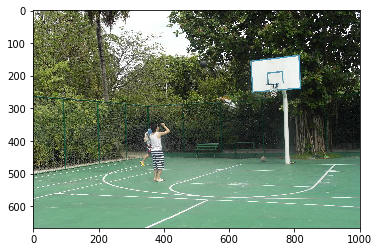

topwords of image:
飞行服 0.773481|光板 0.768527|漫步 0.743724|骑行 0.729388|车顶 0.695992|小猴子 0.693992|铁环 0.679239|克里 0.677253|莲蓬 0.675485|响 0.674376|手卡 0.671216|网旁 0.660353|球网 0.657393|蝌蚪 0.655608|如 0.645355|走进 0.638622|似 0.624641|乐谱 0.623818|排球 0.621497|公墓 0.621169|料理台 0.61986|坚 0.618699|哈密瓜 0.6182|捐钱 0.616647|绿树成荫 0.616285|尘 0.61585|陶罐 0.613341|轴 0.612302|岸 0.606706|敲锣 0.606256|桌椅 0.602356|雪橇犬 0.602256|数字 0.602063|24 0.597093|公园 0.596325|叫喊 0.590207|拴着 0.586147|两袋 0.585338|大声喊叫 0.57243|昏 0.569867|刷毛 0.565626|冰山 0.563946|刚出生 0.56197|金字塔 0.561684|努力 0.560929|游船 0.559644|兔子 0.559619|手球 0.558766|板球 0.557019|球门 0.555802|小象 0.555675|· 0.554444|手风琴 0.553913|纪 0.552906|绿树 0.551034|程 0.549564|草车 0.548368|吊威亚 0.54279|雪堆 0.541959|长衣 0.540253|音乐 0.538493|绿荫 0.537148|中央 0.534854|篮球比赛 0.532522|监控 0.53251|擦皮鞋 0.527124|泛 0.526482|水槽 0.525802|深蓝 0.525394|降落伞 0.525098|海 0.524611|操场上 0.524545|坡道 0.523045|向前走 0.521943|扒 0.521783|藤球 0.519456|苹果树 0.517399|林荫 0.517049|最 0.516817|乒乓球室 0.515363|棍棒 0.514777|撑头 0.51384

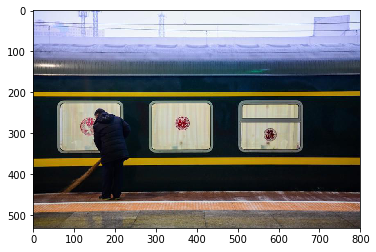

topwords of image:
车厢 0.66811|列车 0.627224|站台 0.622805|地铁 0.614096|车站里 0.599614|公交车 0.556587|候车 0.538917|大巴车 0.531438|大巴 0.524564|火车 0.491033|人员 0.485089|机舱 0.479865|电梯 0.469579|咖啡杯 0.460514|公交 0.455442|客车 0.450893|火车站 0.448388|高铁 0.444023|巴里 0.44395|通道 0.442252|自动扶梯 0.436166|过 0.428249|玻璃 0.426788|地铁站 0.424645|乘客 0.422848|大厅 0.422528|机房 0.421526|里 0.417367|座位 0.415106|口 0.413669|月 0.407502|走廊 0.407252|上船 0.406333|机器 0.404322|巴士 0.40172|列车员 0.400783|玻璃窗 0.396597|机 0.396496|工作服 0.395462|仓 0.394928|蓬头垢面 0.394608|餐车 0.394519|办理 0.393437|保龄球馆 0.390166|机翼 0.389852|行李箱 0.388785|上车 0.384985|玻璃门 0.38481|安检 0.3845|天桥 0.378826|扶梯 0.37864|酱油 0.377522|招呼 0.377313|轨 0.372181|拥挤 0.372097|橱窗 0.371885|豪华 0.367403|音 0.367049|码机 0.36553|太空舱 0.363048|秩 0.362226|制服 0.361313|工作人员 0.361025|保龄球 0.36016|空姐 0.357126|机场 0.356962|电视 0.35587|下车 0.355618|检测仪 0.355204|登机 0.355004|救 0.353957|扫描 0.3532|垃圾桶 0.351822|资 0.351642|仪器 0.351453|调试 0.348848|对面 0.348067|行李 0.347007|身旁 0.345502|调节 0.344811|扫码 0.341529|内站 0.3405

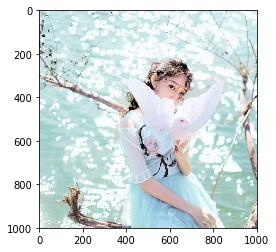

topwords of image:
光板 0.748854|骑行 0.711353|漫步 0.708373|车顶 0.691009|铁环 0.68025|克里 0.67569|手卡 0.671424|莲蓬 0.664416|响 0.655355|网旁 0.647956|走进 0.6311|乐谱 0.630032|如 0.624596|坚 0.62017|哈密瓜 0.612741|敲锣 0.609343|数字 0.605978|陶罐 0.604918|似 0.602926|轴 0.599363|拴着 0.596664|料理台 0.595291|雪橇犬 0.594896|小猴子 0.594866|桌椅 0.587407|岸 0.587317|24 0.581701|两袋 0.567596|金字塔 0.564927|手风琴 0.561519|努力 0.55832|叫喊 0.557393|· 0.556784|游船 0.556351|昏 0.556191|纪 0.554896|刚出生 0.553927|板球 0.553761|冰山 0.553018|兔子 0.543138|吊威亚 0.54182|降落伞 0.541682|长衣 0.536225|程 0.53583|音乐 0.53513|雪堆 0.532102|草车 0.531105|海 0.529839|中央 0.52705|监控 0.52547|泛 0.525042|乒乓球室 0.520352|山有 0.512323|向前走 0.512113|扒 0.510609|蜥蜴 0.510145|擦皮鞋 0.509433|纤 0.49815|面露 0.495904|霜 0.49462|深蓝 0.491017|身 0.490792|水槽 0.490535|费 0.489658|的花海 0.489009|刷牙 0.487191|蓝天白云 0.486783|八 0.48229|景 0.48195|棍棒 0.481787|浴桶 0.479793|体型 0.477206|摆手 0.476788|23 0.476688|摘瓜 0.47531|湖岸 0.474608|当 0.47418|静静地 0.474145|靠近 0.472537|三号 0.471851|倾倒 0.47158|大声喊叫 0.470193|五指 0.467503|各牵 0

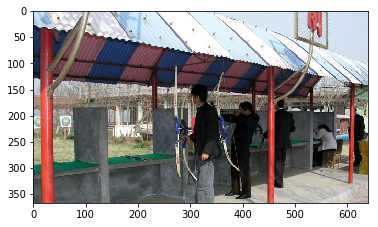

topwords of image:
木马 0.591663|旋转 0.573648|游乐场 0.527983|遮阳棚 0.522232|遮阳伞 0.496146|铁栏 0.481256|公交车 0.479231|口 0.455374|电话亭 0.444653|道 0.440881|雨棚 0.440029|亭子 0.428559|柱子 0.426674|阶梯 0.419418|游乐园 0.418617|边 0.41612|操控 0.415559|巷子 0.408766|保安 0.404993|布袋 0.39868|玻璃 0.395941|凉亭 0.395651|轨 0.391368|马厩 0.391199|场 0.388735|草棚 0.388332|设施 0.386459|棚 0.386332|屋子 0.385557|屋外 0.381486|购买 0.381402|漫步 0.379497|房屋 0.375912|跷跷板 0.37492|透 0.372629|旁洗 0.370383|气息 0.370357|传单 0.368501|冰水 0.364706|房 0.363971|学校 0.363951|铁丝 0.363641|玻璃门 0.363202|练习场 0.363079|平缓 0.36273|棚子 0.362155|换衣间 0.360215|有位 0.358631|轿子 0.357697|校 0.355323|广场 0.354664|发带 0.350219|天台 0.348833|木板 0.348064|公交 0.347964|手拿包 0.347572|呼啦圈 0.347381|一群 0.343719|木地板 0.342304|屋前 0.341969|长颈鹿 0.341594|铁门 0.341551|抹布 0.339394|消防演习 0.339194|犬 0.339051|梯子 0.338908|外有 0.338539|黄衣服 0.338081|练功 0.337655|加工 0.337097|健身器材 0.33649|编钟 0.335992|地铁 0.335819|扯 0.33576|蓬头垢面 0.335495|候车厅 0.335423|遮阳蓬 0.334424|摊位 0.334395|帐篷 0.334323|胡萝卜 0.333752|步 0.333126|标 0

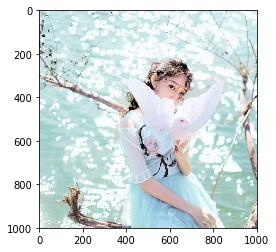

topwords of image:
光板 0.748854|骑行 0.711353|漫步 0.708373|车顶 0.691009|铁环 0.68025|克里 0.67569|手卡 0.671424|莲蓬 0.664416|响 0.655355|网旁 0.647956|走进 0.6311|乐谱 0.630032|如 0.624596|坚 0.62017|哈密瓜 0.612741|敲锣 0.609343|数字 0.605978|陶罐 0.604918|似 0.602926|轴 0.599363|拴着 0.596664|料理台 0.595291|雪橇犬 0.594896|小猴子 0.594866|桌椅 0.587407|岸 0.587317|24 0.581701|两袋 0.567596|金字塔 0.564927|手风琴 0.561519|努力 0.55832|叫喊 0.557393|· 0.556784|游船 0.556351|昏 0.556191|纪 0.554896|刚出生 0.553927|板球 0.553761|冰山 0.553018|兔子 0.543138|吊威亚 0.54182|降落伞 0.541682|长衣 0.536225|程 0.53583|音乐 0.53513|雪堆 0.532102|草车 0.531105|海 0.529839|中央 0.52705|监控 0.52547|泛 0.525042|乒乓球室 0.520352|山有 0.512323|向前走 0.512113|扒 0.510609|蜥蜴 0.510145|擦皮鞋 0.509433|纤 0.49815|面露 0.495904|霜 0.49462|深蓝 0.491017|身 0.490792|水槽 0.490535|费 0.489658|的花海 0.489009|刷牙 0.487191|蓝天白云 0.486783|八 0.48229|景 0.48195|棍棒 0.481787|浴桶 0.479793|体型 0.477206|摆手 0.476788|23 0.476688|摘瓜 0.47531|湖岸 0.474608|当 0.47418|静静地 0.474145|靠近 0.472537|三号 0.471851|倾倒 0.47158|大声喊叫 0.470193|五指 0.467503|各牵 0

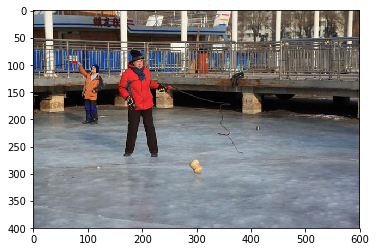

topwords of image:
湿漉漉 0.563026|站台 0.515851|竹筏 0.507475|泥潭 0.49923|河边 0.487947|浑浊 0.485762|空旷 0.483264|淹没 0.480283|快板 0.478663|岸边 0.477976|水中 0.475371|人 0.472786|练舞 0.465884|湖边 0.463545|木筏 0.461902|广场 0.458619|形态各异 0.456279|泥泞 0.45255|一群 0.452214|江边 0.447717|公交车 0.442128|河 0.441665|船 0.439731|积水 0.43854|空地 0.438243|练习场 0.433239|渔 0.432617|淹水 0.430867|人站 0.430313|水 0.427934|大人 0.425972|并排 0.424314|平缓 0.424258|水边 0.42324|前面 0.421259|六个 0.420002|船边 0.417842|橘色 0.415203|相扑 0.412201|授 0.410106|扔球 0.409465|四个 0.409298|捞鱼 0.407683|河道 0.407467|气球 0.407186|学校 0.406791|不 0.404379|成河 0.404353|肩并肩 0.404348|手拉手 0.404175|搀扶 0.402686|浪 0.401711|附近 0.400535|人工 0.399153|满地 0.399077|湖 0.398762|五个 0.398638|一望无垠 0.397464|身后 0.39735|场里 0.396194|棒子 0.395191|候车 0.394023|波澜壮阔 0.394006|泥 0.39281|石板 0.391566|凹凸不平 0.391171|警示 0.390633|深 0.388299|打捞 0.388288|踢毽子 0.387669|气息 0.387467|养殖场 0.387266|小河边 0.386228|湖里 0.385489|模仿 0.38546|河水 0.385079|破 0.384596|湖水 0.384193|队伍 0.38317|匆 0.382497|各自 0.382269|裂 0.382126|养鸡场

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  for word_id, score in zip(word_ids, scores):
    print(vocab.key(int(word_id)), score, end='|')

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))